In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lending_club = pd.read_csv("lending-club-data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lending_club.columns #column names

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [4]:
num_entries, num_attributes = lending_club.shape

In [5]:
num_attributes #number of attributes in the data set

68

In [6]:
num_entries #number of entries in the data set

122607

In [7]:
lending_club.loc[lending_club['bad_loans'] == 1, 'bad_loans'] = -1 #set bad loans to be -1
lending_club.loc[lending_club['bad_loans'] == 0, 'bad_loans'] = 1 #set good loans to be +1

In [8]:
lending_club['bad_loans'] #just printing to make sure the swap worked

0         1
1        -1
2         1
3         1
4         1
5         1
6        -1
7        -1
8         1
9         1
10       -1
11        1
12       -1
13        1
14        1
15        1
16        1
17        1
18       -1
19        1
20        1
21       -1
22        1
23       -1
24       -1
25        1
26        1
27        1
28        1
29        1
         ..
122577    1
122578    1
122579    1
122580   -1
122581    1
122582    1
122583   -1
122584    1
122585    1
122586    1
122587   -1
122588    1
122589    1
122590   -1
122591    1
122592    1
122593    1
122594   -1
122595    1
122596   -1
122597    1
122598    1
122599    1
122600    1
122601   -1
122602   -1
122603    1
122604   -1
122605   -1
122606    1
Name: bad_loans, Length: 122607, dtype: int64

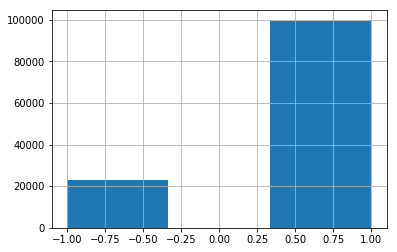

In [9]:
lending_club['bad_loans'].hist(bins=3)

Above is the distribution of good loans to bad loans, with good loans on the right. The job of differentiating good loans from bad should not be difficult because the entropy is fairly low in the dataset, since we have a 5:1 good to bad loan distribution.

In [10]:
df = lending_club[['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti', 'purpose',
                  'term', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'bad_loans']]

In [11]:
df

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.70,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.40,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.50,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.00,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.30,0.00,1
5,E,E1,0,10,RENT,5.35,car,36 months,1,1,87.50,0.00,1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.60,0.00,-1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.50,0.00,-1
8,C,C3,0,6,OWN,16.12,debt_consolidation,60 months,1,1,20.60,0.00,1
9,B,B5,0,11,OWN,10.78,debt_consolidation,36 months,1,1,67.10,0.00,1


In [12]:
from sklearn.preprocessing import OneHotEncoder
df_dummies = pd.get_dummies(df) #the get dummies method gives you
col_names = df_dummies.columns.tolist() #the next couple lines just move the columns around to make it easier on me
col_names = col_names[:7] + col_names[8:] + col_names[7:8]
df_dummies = df_dummies[col_names]
print("One Hot Encoded Columns:\n",list(df_dummies.columns))
print("\nOne Hot Encoded Values:\n",df_dummies.values)

One Hot Encoded Columns:
 ['short_emp', 'emp_length_num', 'dti', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose

In [13]:
split_length = int(len(df_dummies) * 0.8)

In [14]:
train_data = df_dummies.iloc[:split_length,:]
validation_data = df_dummies.iloc[split_length:,:]

In [15]:
train_data.shape

(98085, 68)

In [16]:
validation_data.shape

(24522, 68)

In [17]:
import sklearn
from sklearn import tree
import numpy as np

decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
small_model = tree.DecisionTreeClassifier(max_depth=2)
small_model.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
# predicted_small = small_model.predict(validation_data.iloc[:,:-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_C,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,bad_loans
98085,1,1,12.68,1,1,66.2,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
98086,1,1,9.98,1,1,65.3,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
98087,0,2,20.40,0,1,62.3,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
98088,0,2,8.63,0,1,16.8,0.0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
98089,0,11,5.25,0,1,94.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
98090,0,3,10.58,1,1,49.1,0.0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
98091,0,5,16.14,0,1,69.4,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,-1
98092,0,4,13.51,1,1,64.6,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
98093,0,11,18.35,0,1,63.8,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,-1
98094,1,0,7.78,1,1,86.7,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [19]:
test_data = validation_data.iloc[5:9,:-1]
test_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_C,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
98090,0,3,10.58,1,1,49.1,0.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
98091,0,5,16.14,0,1,69.4,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
98092,0,4,13.51,1,1,64.6,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
98093,0,11,18.35,0,1,63.8,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [20]:
decision_tree_model.predict(test_data)

array([ 1,  1, -1,  1], dtype=int64)

The decision tree model only predicted 1/4 correctly

In [21]:
decision_tree_model.predict_proba(test_data)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

All entries predicted to be safe have a probability of 1

In [22]:
small_model.predict(test_data)

array([1, 1, 1, 1], dtype=int64)

In [23]:
small_model.predict_proba(test_data)

array([[0.15787133, 0.84212867],
       [0.31573839, 0.68426161],
       [0.15787133, 0.84212867],
       [0.15787133, 0.84212867]])

the small model actually did better than the decision tree model as it correctly classified 2/4 of the samples.

In [24]:
print("Small Model Accuracy on Training Data:",
      small_model.score(train_data.iloc[:,:-1], train_data.iloc[:,-1]))
print("Decision Tree Model Accuracy on Training Data:",
      decision_tree_model.score(train_data.iloc[:,:-1], train_data.iloc[:,-1]))

Small Model Accuracy on Training Data: 0.8036193097823316
Decision Tree Model Accuracy on Training Data: 0.9999694142835296


In [25]:
small_score = small_model.score(validation_data.iloc[:,:-1], validation_data.iloc[:,-1])
decision_tree_score = decision_tree_model.score(validation_data.iloc[:,:-1], validation_data.iloc[:,-1])
print("Small Model Accuracy on Validation Data: %.2f" % small_score)
print("Decision Tree Model Accuracy on Validation Data: %.2f" % decision_tree_score)

Small Model Accuracy on Validation Data: 0.86
Decision Tree Model Accuracy on Validation Data: 0.72


In [26]:
big_model = tree.DecisionTreeClassifier(max_depth=10)
big_model.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
print("Big Model Accuracy on Training Data:",
      big_model.score(train_data.iloc[:,:-1], train_data.iloc[:,-1]))
print("Big Model Accuracy on Validation Data: %.2f"
      % big_model.score(validation_data.iloc[:,:-1], validation_data.iloc[:,-1]))

Big Model Accuracy on Training Data: 0.8122240913493398
Big Model Accuracy on Validation Data: 0.85


In [28]:
decision_tree_predictions = decision_tree_model.predict(validation_data.iloc[:,:-1])
false_neg, false_pos = 0, 0
for index, predicted in enumerate(decision_tree_predictions):
    actual = validation_data.iloc[index,-1]
    if predicted == -1 and actual == 1:
        false_neg += 1
    elif predicted == 1 and actual == -1:
        false_pos += 1
    else:
        continue
cost_of_false_predict = (false_neg * 10000) + (false_pos * 20000)
print("Number of False Negatives:", false_neg,"\nNumber of False Positives:",false_pos,
     "\nCost of False Predictions: ${:,.2f}".format(cost_of_false_predict))

Number of False Negatives: 4392 
Number of False Positives: 2546 
Cost of False Predictions: $94,840,000.00
